In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def simple_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        layers.Conv2D(16,3, padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Conv2D(32,3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [4]:
# Define the input shape and number of classes (Arabic characters)
input_shape = (64, 64, 1)  # adjust based on your image dimensions
num_classes = 28  # assuming recognition of Arabic characters

In [5]:
# Create an instance of the model
model = simple_model(input_shape, num_classes)

C:\Users\Tilika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Load and preprocess your dataset
data_dir = r'D:\anas\مشروع مواضيع خاصة 1\arabicChar'
batch_size = 5


In [8]:
# Use ImageDataGenerator for data augmentation and loading images
data_generator = ImageDataGenerator(rescale=1./255)
data_flow = data_generator.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
  
    
    
)

Found 448 images belonging to 28 classes.


In [9]:
print(data_flow.class_indices)
print(len(data_flow))

{'أ': 0, 'ب': 1, 'ت': 2, 'ث': 3, 'ج': 4, 'ح': 5, 'خ': 6, 'د': 7, 'ذ': 8, 'ر': 9, 'ز': 10, 'س': 11, 'ش': 12, 'ص': 13, 'ض': 14, 'ط': 15, 'ظ': 16, 'ع': 17, 'غ': 18, 'ف': 19, 'ق': 20, 'ك': 21, 'ل': 22, 'م': 23, 'ن': 24, 'ه': 25, 'و': 26, 'ي': 27}
90


In [10]:
# Train the model
model.fit(data_flow, epochs=55)

Epoch 1/55


C:\Users\Tilika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.0652 - loss: 3.4215
Epoch 2/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.0483 - loss: 3.3286
Epoch 3/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.0169 - loss: 3.3324
Epoch 4/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.0397 - loss: 3.3272
Epoch 5/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.0828 - loss: 3.1629
Epoch 6/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.1488 - loss: 2.9723
Epoch 7/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2000 - loss: 2.7306
Epoch 8/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2770 - loss: 2.4084
Epoch 9/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.3778 - loss: 1.9907
Epoch 10/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.4421 - loss: 1.7128
Epoch 11/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.4861 - loss: 1.5407
Epoch 12/55
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.5624 - l

In [11]:


# Load and preprocess your test dataset
test_data_dir = r'D:\anas\‏‏arabicChartest'
test_data_generator = ImageDataGenerator(rescale=1./255)
test_data_flow = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for correct evaluation
)


Found 112 images belonging to 28 classes.


In [12]:

# Get predictions for the test dataset
test_predictions = model.predict(test_data_flow)
test_true_labels = test_data_flow.classes
test_predicted_labels = np.argmax(test_predictions, axis=1)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


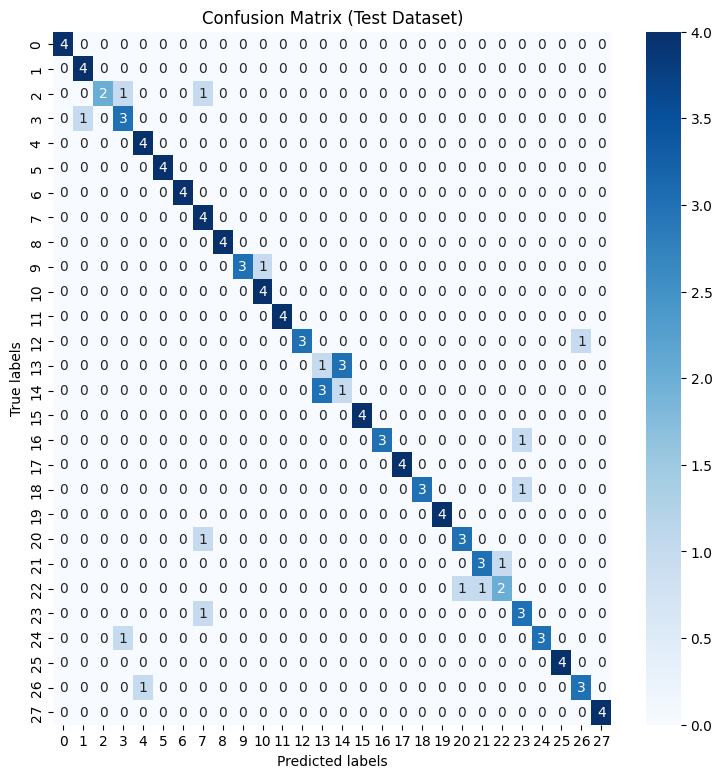

Accuracy: 0.8214285714285714
Accuracy : High
F1 Score : 0.8214672232529374
F1 Score : High


In [17]:

# Calculate confusion matrix and F1 score and accuracy for the test dataset
test_conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
test_f1 = f1_score(test_true_labels, test_predicted_labels, average='weighted')
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
# Print the confusion matrix and F1 score and accuracy for the test dataset
plt.figure(figsize=(9,9))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Test Dataset)')
plt.show()
print(f"Accuracy: {accuracy}")
if accuracy >= 0.75:
    print("Accuracy : High")
elif accuracy >= 0.5:
    print("Accuracy : Medium")
else:
    print("Accuracy : Low")
print("F1 Score :", test_f1)
if test_f1 >= 0.75:
    print("F1 Score : High")
elif test_f1 >= 0.5:
    print("F1 Score : Medium")
else:
    print("F1 Score : Low")